In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv('data_survival.csv')
df2 = pd.read_csv('data_hazard.csv')

In [6]:
x = df2['pt'].value_counts()[:15]

In [7]:
x.index.values

array(['Off label use', 'Condition aggravated',
       'Intentional product use issue',
       'Inappropriate schedule of product administration',
       'Product use issue', 'Blood pressure fluctuation',
       'Drug ineffective', 'Arthralgia', 'Weight increased', 'Fatigue',
       'Blood pressure increased', 'Nausea', 'Weight decreased',
       'Malaise', 'Diarrhoea'], dtype=object)

In [8]:
df1['start_dt'].fillna(value=float(20180407.0),inplace=True)

In [9]:
for i in range(len(df1['start_dt'])):
    if df1['start_dt'][i] < 2022:
        df1['start_dt'][i] = (df1['start_dt'][i] * 10000) + 101

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for i in range(len(df1['start_dt'])):
    if df1['start_dt'][i] < 202112:
        df1['start_dt'][i] = (df1['start_dt'][i] * 100) + 1

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df1['start_dt'] = pd.to_datetime(df1['start_dt'], format='%Y%m%d')

In [12]:
df1['fda_dt'] = pd.to_datetime(df1['fda_dt'], format='%Y%m%d')

In [14]:
df1['duration'] = (df1['fda_dt'] - df1['start_dt'])/ np.timedelta64(1,'D')

In [13]:
df1.head()

,primaryid,start_dt,drugname,fda_dt,outc_cod
0,160735425,2018-04-07,Infliximab,2021-09-29,OT
1,160735425,2018-04-07,Infliximab,2021-09-29,OT
2,160799174,2018-04-07,Infliximab,2021-09-07,DE
3,160799174,2018-04-07,Infliximab,2021-09-07,HO
4,160799174,2018-04-07,Infliximab,2021-09-07,OT


In [15]:
df1['outcome'] = ''

In [16]:
#assumimng HO,RI,DS,LT,DE as outcomes with value 1 and CA,OT with value 0
for i in range(len(df1['outc_cod'])):
    if df1['outc_cod'][i] in ['HO','RI','DS','LT','DE']:
        df1['outcome'][i] = 1
    else:
        df1['outcome'][i] = 0

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
col_names = ['primaryid','duration','outcome']
df_su = pd.DataFrame(columns = col_names)

In [18]:
for i in range(len(df1['primaryid'].unique())):
    pid = df1['primaryid'].unique()[i]
    out = df1[df1['primaryid'] == pid]['outcome'].unique().max()
    dur = df1[df1['primaryid'] == pid]['duration'].unique().min()
    df_su.loc[i] = [pid,dur,out]

In [19]:
df_su['duration'] = df_su['duration']/365

In [20]:
df_su.head()

,primaryid,duration,outcome
0,160735425.0,3.482192,0.0
1,160799174.0,3.421918,1.0
2,160821476.0,3.323288,0.0
3,164779503.0,3.408219,0.0
4,166888634.0,3.306849,0.0


In [21]:
df2.head()

,primaryid,drugname,pt,outc_cod
0,160821476,Infliximab,Skin infection,OT
1,160821476,Infliximab,Sinusitis,OT
2,160821476,Infliximab,Pain,OT
3,160821476,Infliximab,Off label use,OT
4,160821476,Infliximab,Joint swelling,OT


In [22]:
col_names1 = ['primaryid','duration','outcome']
for i in range(len(x.index.values)):
    col_names1.append(x.index.values[i])

In [23]:
df_hz = pd.DataFrame(columns = col_names1)

In [24]:
l = []
for i in range(len(df2['primaryid'].unique())):
    k = df_su[df_su['primaryid'] == df2['primaryid'].unique()[i]].values[0]
    for m in range(len(x.index.values)):
        val = x.index.values[m] in df2[df2['primaryid'] == df2['primaryid'].unique()[i]]['pt'].unique()
        k = np.append(k,val)
    df_hz.loc[i] = k

In [26]:
df_hz.head()

,primaryid,duration,outcome,Off label use,Condition aggravated,Intentional product use issue,Inappropriate schedule of product administration,Product use issue,Blood pressure fluctuation,Drug ineffective,Arthralgia,Weight increased,Fatigue,Blood pressure increased,Nausea,Weight decreased,Malaise,Diarrhoea
0,160821476.0,3.323288,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,166888634.0,3.306849,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,166924285.0,3.345205,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,167830657.0,2.449315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,168388644.0,3.468493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_hz.drop('primaryid', axis=1, inplace=True)

In [28]:
#DeepSurv Model
import matplotlib.pyplot as plt
import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [29]:
df_test = df_hz.sample(frac=0.2)
df_train = df_hz.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [30]:
cols_leave = []
for i in range(len(x.index.values)):
    cols_leave.append(x.index.values[i])


In [31]:
from sklearn_pandas import DataFrameMapper

In [32]:
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(leave)
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [33]:
x_train[0]

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [34]:
get_target = lambda df: (df['duration'].values, df['outcome'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

In [35]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [36]:
model = CoxPH(net, tt.optim.Adam)

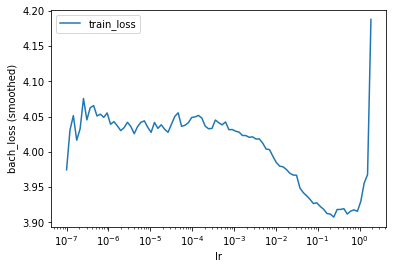

In [37]:
batch_size = 128
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [38]:
lrfinder.get_best_lr()

0.02420128264794396

In [39]:
model.optimizer.set_lr(0.01)

In [40]:
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [41]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 3.9087,	val_loss: 3.7031
1:	[0s / 0s],		train_loss: 3.7566,	val_loss: 3.7292
2:	[0s / 0s],		train_loss: 3.7288,	val_loss: 3.7238
3:	[0s / 0s],		train_loss: 3.7197,	val_loss: 3.7366
4:	[0s / 0s],		train_loss: 3.6990,	val_loss: 3.7559
5:	[0s / 0s],		train_loss: 3.6540,	val_loss: 3.7820
6:	[0s / 0s],		train_loss: 3.6675,	val_loss: 3.8056
7:	[0s / 0s],		train_loss: 3.6514,	val_loss: 3.8064
8:	[0s / 0s],		train_loss: 3.6221,	val_loss: 3.8033
9:	[0s / 0s],		train_loss: 3.6176,	val_loss: 3.8408
10:	[0s / 0s],		train_loss: 3.5816,	val_loss: 3.8353
CPU times: user 940 ms, sys: 7.17 ms, total: 947 ms
Wall time: 239 ms


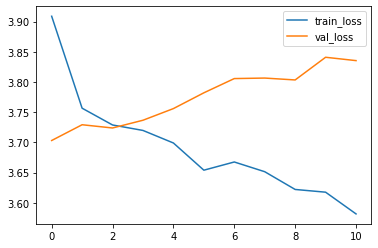

In [42]:
_ = log.plot()

In [43]:
model.partial_log_likelihood(*val).mean()

-4.460283

In [44]:
_ = model.compute_baseline_hazards()

In [45]:
surv = model.predict_surv_df(x_test)

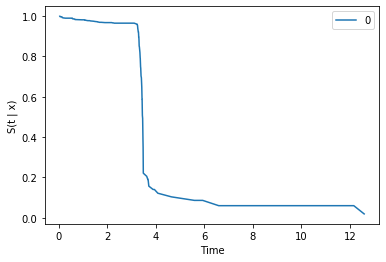

In [68]:
surv.iloc[:, :1].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

{'loss': tensor(3.5341, dtype=torch.float64, grad_fn=<NegBackward>)}

In [67]:
ev = EvalSurv(surv,durations_test,events_test,censor_surv='km')

AssertionError: 

In [65]:
ev.concordance_td()

0.5774714828897338

In [66]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ValueError: Need to add censor_surv to compute Brier score. Use 'add_censor_est'
            or 'add_km_censor' for Kaplan-Meier

In [141]:
ev.integrated_brier_score(time_grid)

0.09305834934173904

In [142]:
ev.integrated_nbll(time_grid)

0.3218577087574992

In [93]:
#DeepHit

In [95]:
from pycox.models import DeepHitSingle

In [169]:
num_durations = 10
scheme = 'equidistant' # or quantiles
labtrans = DeepHitSingle.label_transform(num_durations, scheme)
get_target = lambda df: (df['duration'].values, df['outcome'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

# Plotting discrete intervals
from pycox.utils import kaplan_meier
plt.vlines(labtrans.cuts, 0, 1, colors='black', linestyles="--", label='Discretization Grid')
kaplan_meier(*get_target(df_train)).plot(label='Kaplan-Meier')
plt.ylabel('S(t)')
plt.legend()
_ = plt.xlabel('Time')

AssertionError: Need `right_cuts` to be sorted.

In [151]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)

In [158]:
model = DeepHitSingle(net, tt.optim.Adam, alpha=0.2, sigma=0.1)

In [159]:
batch_size = 256
lr_finder = model.lr_finder(x_train, y_train, batch_size=10, tolerance=3)
_ = lr_finder.plot()

ValueError: Network output `phi` is too small for `idx_durations`. Need at least `phi.shape[1] = 4.484931506849315`, but got `phi.shape[1] = 1`

In [171]:
df.to_csv('out_hz.csv')

NameError: name 'df' is not defined